<a href="https://colab.research.google.com/github/mahima672000/Image-classification-through-Neural-Network/blob/main/Image_classification_through_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score

In [ ]:
from os import walk
path = 'natural_images'
labels = []
for (dirpath, folder, filenames) in walk(path):
    labels.extend(folder)
    break

In [ ]:
print(labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


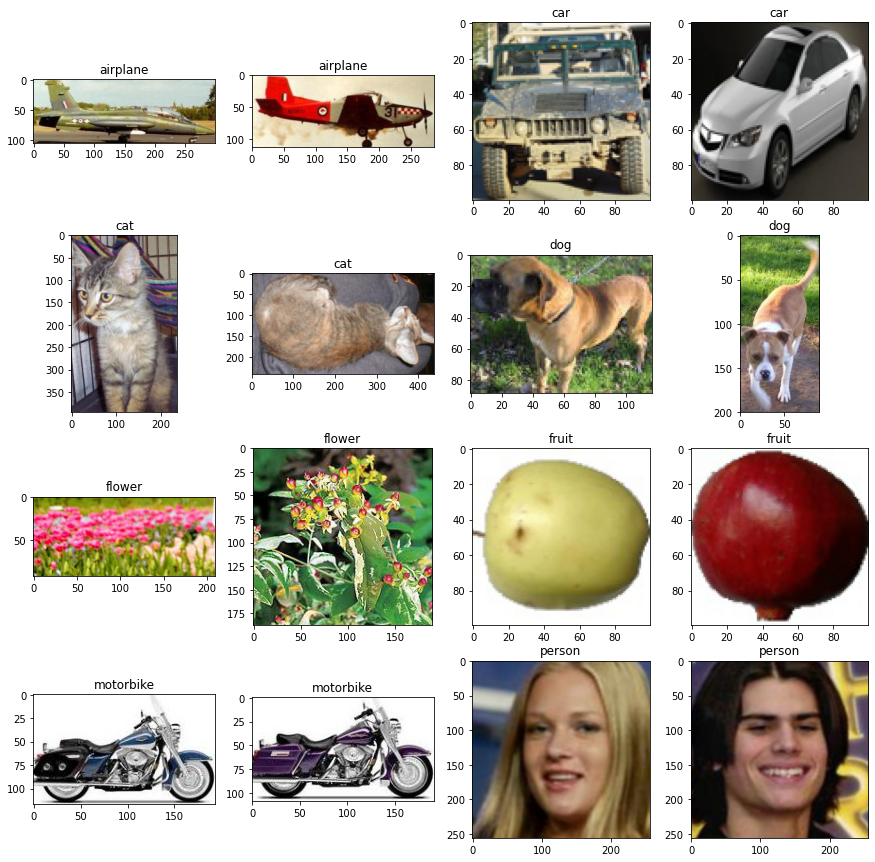

In [ ]:
plt.figure(figsize = (15,15))
cnt=0
num=[]
for label in labels:
    temppath = f'natural_images/{label}/'
    for (dirpath, folder, imgs) in walk(temppath):
        for i in range(2):
            img = imgs[i]
            impath = temppath+img
            img = mpimg.imread(impath)
            plt.subplot(4,4,cnt+i+1)
            plt.imshow(img)
            plt.title(label)
        num.append(len(imgs))
        cnt+=2


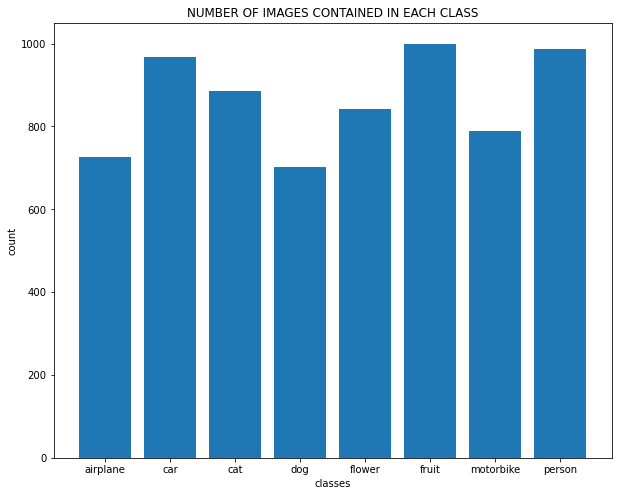

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    temppath = f'natural_images/{label}/'
    for (dirpath, folder, imgs) in walk(temppath):
        for image_path in imgs:
            image = cv2.imread(temppath+image_path)
            image_resized = cv2.resize(image, (32,32))
            x_data.append(np.array(image_resized))
            y_data.append(label)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (6899, 32, 32, 3) and that of Y is:  (6899,)


In [ ]:
xn_data = x_data.astype('float32')/255

## CNN - With Normalisation

In [ ]:
r = np.arange(xn_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = xn_data[r]
Y = y_categorical[r]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
Y_test = np.argmax(Y_test, axis = 1)

In [ ]:
from keras import models, layers
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn.add(layers.MaxPool2D(pool_size=(2, 2)))
cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(rate=0.25))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dropout(rate=0.5))
cnn.add(layers.Dense(8, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
cnn.compile(loss='categorical_crossentropy', 
    optimizer=Adam(lr=0.001) ,metrics=['accuracy'])


C:\Users\subhash\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
withnormal = cnn.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
121/121 [==============================] - 6s 41ms/step - loss: 1.2351 - accuracy: 0.5654 - val_loss: 0.7457 - val_accuracy: 0.7308
Epoch 2/25
121/121 [==============================] - 4s 36ms/step - loss: 0.6074 - accuracy: 0.7807 - val_loss: 0.4886 - val_accuracy: 0.8261
Epoch 3/25
121/121 [==============================] - 4s 36ms/step - loss: 0.4364 - accuracy: 0.8361 - val_loss: 0.4007 - val_accuracy: 0.8582
Epoch 4/25
121/121 [==============================] - 4s 36ms/step - loss: 0.3804 - accuracy: 0.8532 - val_loss: 0.3774 - val_accuracy: 0.8561
Epoch 5/25
121/121 [==============================] - 4s 36ms/step - loss: 0.3294 - accuracy: 0.8783 - val_loss: 0.3772 - val_accuracy: 0.8613
Epoch 6/25
121/121 [==============================] - 4s 36ms/step - loss: 0.2592 - accuracy: 0.9071 - val_loss: 0.3551 - val_accuracy: 0.8706
Epoch 7/25
121/121 [==============================] - 4s 36ms/step - loss: 0.2555 - accuracy: 0.8993 - val_loss: 0.3087 - val_accuracy: 0.8965

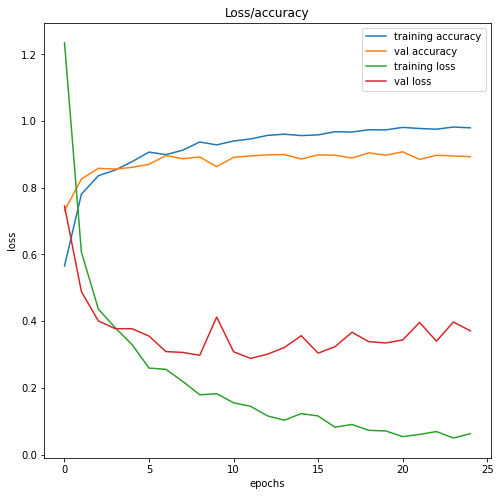

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(withnormal.history['accuracy'], label='training accuracy')
plt.plot(withnormal.history['val_accuracy'], label='val accuracy')
plt.plot(withnormal.history['loss'], label='training loss')
plt.plot(withnormal.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
Y_pred=cnn.predict(X_test) 
Y_pred=np.argmax(Y_pred,axis=1)
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print()
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.8932367149758454

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       231
           1       0.88      0.95      0.91       299
           2       0.78      0.70      0.74       275
           3       0.66      0.69      0.67       209
           4       0.91      0.86      0.89       255
           5       1.00      1.00      1.00       275
           6       0.92      0.98      0.95       224
           7       0.98      0.99      0.99       302

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070



Text(69.0, 0.5, 'Truth')

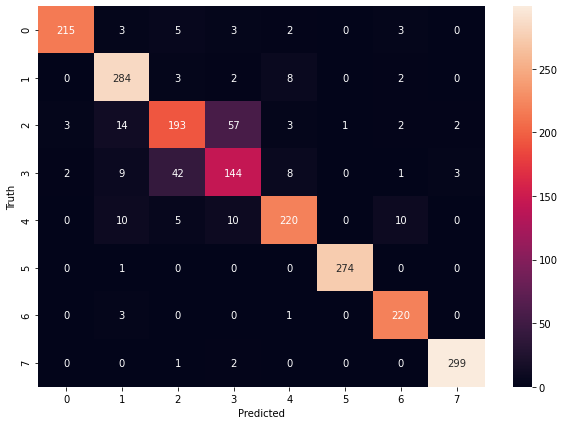

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## CNN - WIthout Normalisation

In [ ]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
Y_test = np.argmax(Y_test, axis = 1)

In [ ]:
withoutnormal = cnn.fit(X_train, Y_train, epochs=25, validation_split=0.2,verbose=0)
Y_pred=cnn.predict(X_test) 
Y_pred=np.argmax(Y_pred,axis=1)

In [ ]:
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print()
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.3038647342995169

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       231
           1       0.58      0.19      0.29       299
           2       0.53      0.04      0.07       275
           3       0.22      0.01      0.02       209
           4       0.67      0.09      0.15       255
           5       0.96      0.90      0.93       275
           6       0.50      0.01      0.03       224
           7       0.17      0.95      0.29       302

    accuracy                           0.30      2070
   macro avg       0.45      0.27      0.22      2070
weighted avg       0.47      0.30      0.24      2070



Text(69.0, 0.5, 'Truth')

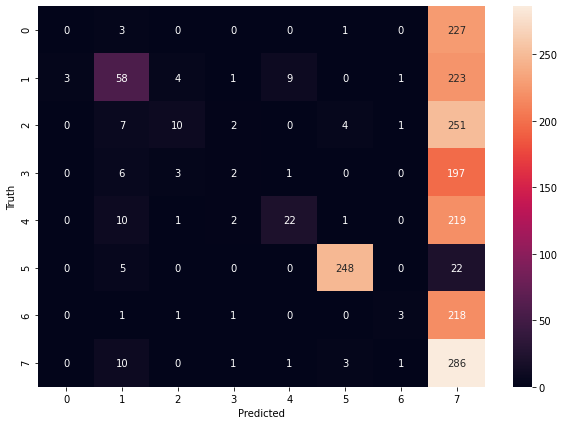

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ANN - With Normalisation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    temppath = f'natural_images/{label}/'
    for (dirpath, folder, imgs) in walk(temppath):
        for image_path in imgs:
            image = cv2.imread(temppath+image_path)
            image_resized = cv2.resize(image, (56,56)).flatten()
            x_data.append(np.array(image_resized))
            y_data.append(label)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
xn_data = x_data.astype('float32')/255

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [ ]:
r = np.arange(xn_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = xn_data[r]
Y = y_encoded[r]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
ann=keras.Sequential([keras.layers.Dense(8, input_shape=(9408,)),
                        keras.layers.Dense(8, input_shape=(9408,),activation='sigmoid')])
ann.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
anns=ann.fit(X_train, Y_train, validation_split=0.3, batch_size=5,epochs=25)

Epoch 1/25
676/676 [==============================] - 3s 4ms/step - loss: 1.7557 - accuracy: 0.5308 - val_loss: 1.1290 - val_accuracy: 0.6273
Epoch 2/25
676/676 [==============================] - 2s 3ms/step - loss: 1.1331 - accuracy: 0.6621 - val_loss: 0.9353 - val_accuracy: 0.6970
Epoch 3/25
676/676 [==============================] - 3s 4ms/step - loss: 0.8822 - accuracy: 0.7068 - val_loss: 0.9035 - val_accuracy: 0.6915
Epoch 4/25
676/676 [==============================] - 3s 5ms/step - loss: 0.7722 - accuracy: 0.7314 - val_loss: 1.1407 - val_accuracy: 0.6232
Epoch 5/25
676/676 [==============================] - 3s 4ms/step - loss: 0.7049 - accuracy: 0.7485 - val_loss: 1.1158 - val_accuracy: 0.6598
Epoch 6/25
676/676 [==============================] - 3s 4ms/step - loss: 0.6939 - accuracy: 0.7639 - val_loss: 1.1520 - val_accuracy: 0.6632
Epoch 7/25
676/676 [==============================] - 3s 5ms/step - loss: 0.6183 - accuracy: 0.7683 - val_loss: 0.9682 - val_accuracy: 0.6853
Epoch 

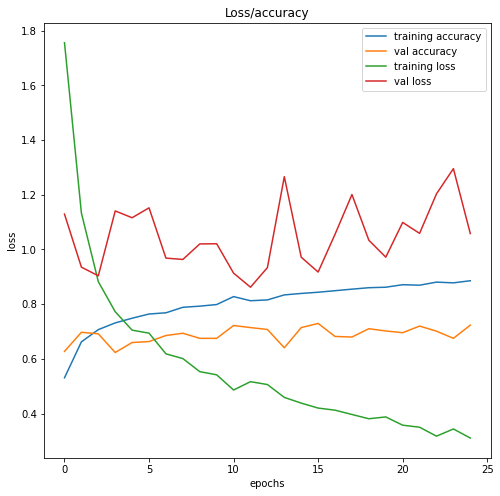

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(anns.history['accuracy'], label='training accuracy')
plt.plot(anns.history['val_accuracy'], label='val accuracy')
plt.plot(anns.history['loss'], label='training loss')
plt.plot(anns.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
Y_pred=ann.predict(X_test) 
Y_pred=np.argmax(Y_pred,axis=1)
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print()
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.7178743961352657

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       231
           1       0.79      0.79      0.79       299
           2       0.52      0.35      0.41       275
           3       0.34      0.46      0.39       209
           4       0.61      0.58      0.60       255
           5       0.82      0.99      0.90       275
           6       0.95      0.74      0.83       224
           7       0.91      0.95      0.93       302

    accuracy                           0.72      2070
   macro avg       0.71      0.71      0.70      2070
weighted avg       0.72      0.72      0.71      2070



Text(69.0, 0.5, 'Truth')

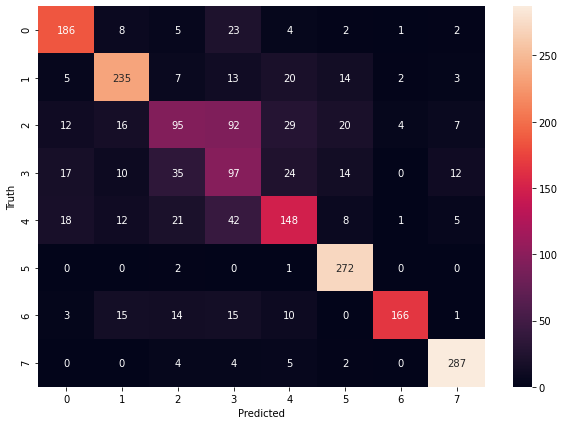

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ANN - Without Normalisation

In [ ]:
X = x_data[r]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
anno=ann.fit(X_train, Y_train, validation_split=0.3, batch_size=5,epochs=25,verbose=0)

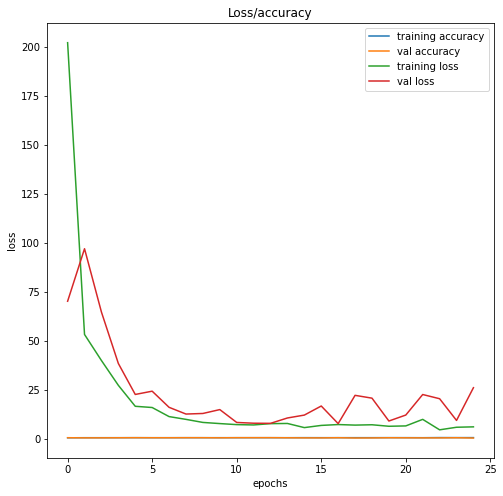

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(anno.history['accuracy'], label='training accuracy')
plt.plot(anno.history['val_accuracy'], label='val accuracy')
plt.plot(anno.history['loss'], label='training loss')
plt.plot(anno.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
Y_pred=ann.predict(X_test) 
Y_pred=np.argmax(Y_pred,axis=1)
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print()
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.11256038647342995

              precision    recall  f1-score   support

           0       0.10      0.97      0.18       204
           1       0.75      0.10      0.17       304
           2       0.07      0.00      0.01       251
           3       0.00      0.00      0.00       213
           4       0.50      0.01      0.02       257
           5       0.00      0.00      0.00       301
           6       1.00      0.01      0.02       235
           7       0.00      0.00      0.00       305

    accuracy                           0.11      2070
   macro avg       0.30      0.14      0.05      2070
weighted avg       0.30      0.11      0.05      2070



C:\Users\subhash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

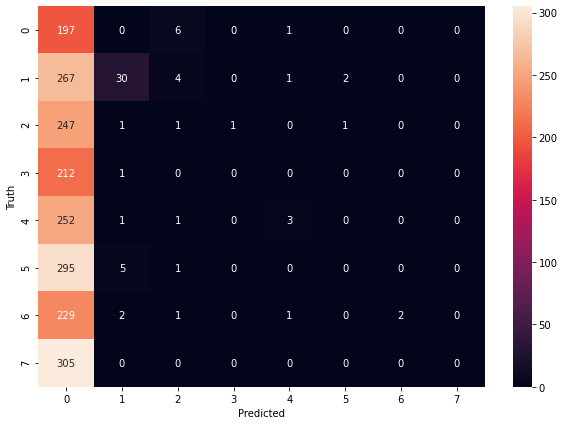

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')